In [3]:
import seaborn as sns
import pandas as pd
import sqlite3
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Create a database called Titanic
conn = sqlite3.connect('Titanic.db')
cursor = conn.cursor()

In [7]:
# Save the dataFrame to a table called titanic_passengers
df.to_sql('titanic_passengers', conn, if_exists='replace', index=False)

891

In [9]:
# Read from database
titanic_from_db = pd.read_sql('SELECT * FROM titanic_passengers', conn)
titanic_from_db.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,None,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,None,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,None,Southampton,no,1


In [12]:
# Check for missing values
titanic_from_db.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


In [11]:
titanic_from_db.info()
titanic_from_db.describe()
titanic_from_db['survived'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    int64  
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 104.5+ KB


,count
survived,
0,549
1,342


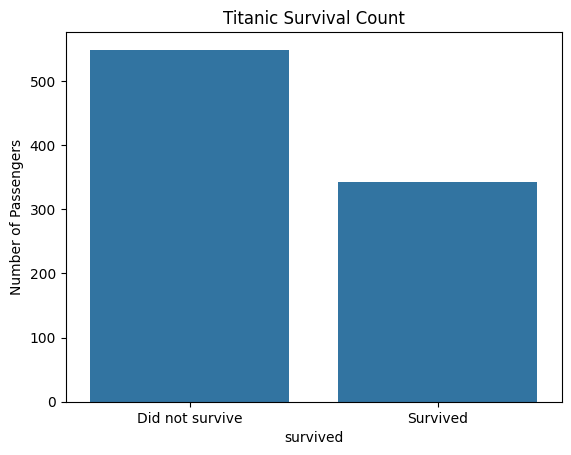

In [15]:
# Visualization
import matplotlib.pyplot as plt

sns.countplot(x='survived', data=titanic_from_db)
plt.xticks([0,1], ['Did not survive', 'Survived'])  # change 0 and 1 to readable labels
plt.ylabel("Number of Passengers")
plt.title("Titanic Survival Count")
plt.show()